Correlation Matrix:
               Price  Bedrooms  Bathrooms  Area_sqft
Price      1.000000  0.982322   0.950125   0.982014
Bedrooms   0.982322  1.000000   0.950057   0.985733
Bathrooms  0.950125  0.950057   1.000000   0.970567
Area_sqft  0.982014  0.985733   0.970567   1.000000


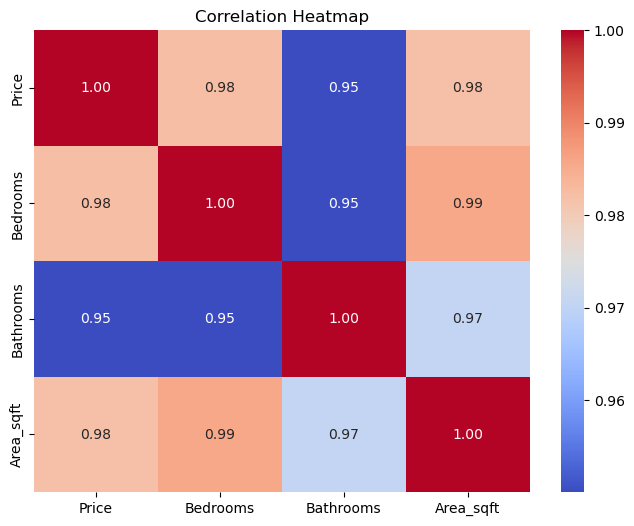

Pairs of variables with correlation > 0.8:
Price and Bedrooms → Correlation: 0.98
Price and Bathrooms → Correlation: 0.95
Price and Area_sqft → Correlation: 0.98
Bedrooms and Bathrooms → Correlation: 0.95
Bedrooms and Area_sqft → Correlation: 0.99
Bathrooms and Area_sqft → Correlation: 0.97


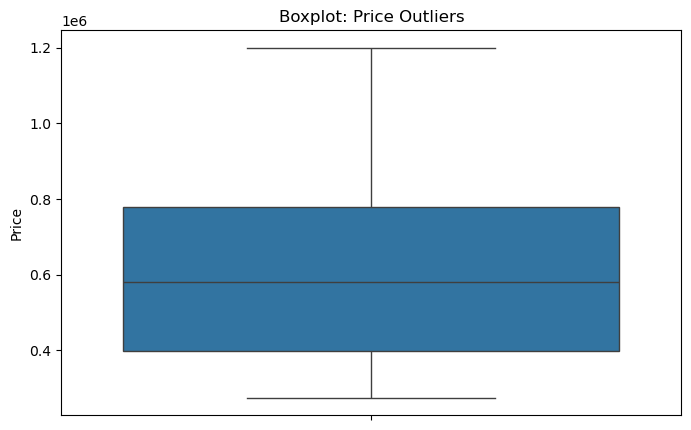

Number of outliers in Price: 0
Outlier values:
 []


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("housing.csv")

numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

high_corr = []
cols = numeric_df.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        corr_value = corr_matrix.iloc[i,j]
        if abs(corr_value) > 0.8:
            high_corr.append((cols[i], cols[j], corr_value))

if high_corr:
    print("Pairs of variables with correlation > 0.8:")
    for var1, var2, value in high_corr:
        print(f"{var1} and {var2} → Correlation: {value:.2f}")
else:
    print("No variable pairs with correlation higher than 0.8 found.")

plt.figure(figsize=(8,5))
sns.boxplot(y=df['Price'])
plt.title("Boxplot: Price Outliers")
plt.ylabel("Price")
plt.show()

q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print(f"Number of outliers in Price: {len(outliers)}")
print("Outlier values:\n", outliers['Price'].values)